In [6]:
#https://video.ittensive.com/python-advance d/data-44-structure-4.csv.gz
#https://video.ittensive.com/python-advanced/russia.json
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes
# В этих в двух наборах данных разные названия регионов, поэтому потребуется преобразовать названия регионов к единому виду, формату
data = pd.read_csv("data-44-structure-4.csv.gz", usecols=["Объект","Регион"])
#Регион приведем к верхнему регистру (для одинаковости)
data["Регион"] = data["Регион"].str.upper()
#сделаем группировку по региону
data = data.groupby("Регион").count()
#print (data.index.values)


In [7]:
#Загрузим геоданные
geo = gpd.read_file("https://video.ittensive.com/python-advanced/russia.json")
print(geo)
#приведем к Меркатору
geo = geo.to_crs({"init": 'epsg:3857'})
geo["NL_NAME_1"] = geo["NL_NAME_1"].str.upper()
print(geo)

    ID_0  ISO  NAME_0  ID_1             NAME_1  \
0    186  RUS  Russia    28  Karachay-Cherkess   
1    186  RUS  Russia    29            Karelia   
2    186  RUS  Russia    30           Kemerovo   
3    186  RUS  Russia    31         Khabarovsk   
4    186  RUS  Russia    32            Khakass   
..   ...  ...     ...   ...                ...   
80   186  RUS  Russia    40        Krasnoyarsk   
81   186  RUS  Russia    21            Irkutsk   
82   186  RUS  Russia    13  Zabaikalskiy Krai   
83   186  RUS  Russia    27          Kamchatka   
84   186  RUS  Russia    60              Perm'   

                          NL_NAME_1  \
0   КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСПУБЛИКА   
1                РЕСПУБЛИКА КАРЕЛИЯ   
2               КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                  ХАБАРОВСКИЙ КРАЙ   
4                РЕСПУБЛИКА ХАКАСИЯ   
..                              ...   
80                КРАСНОЯРСКИЙ КРАЙ   
81                ИРКУТСКАЯ ОБЛАСТЬ   
82               ЗАБАЙКАЛЬСКИЙ КРАЙ   
83       

C:\Users\Mikhail\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


    ID_0  ISO  NAME_0  ID_1             NAME_1  \
0    186  RUS  Russia    28  Karachay-Cherkess   
1    186  RUS  Russia    29            Karelia   
2    186  RUS  Russia    30           Kemerovo   
3    186  RUS  Russia    31         Khabarovsk   
4    186  RUS  Russia    32            Khakass   
..   ...  ...     ...   ...                ...   
80   186  RUS  Russia    40        Krasnoyarsk   
81   186  RUS  Russia    21            Irkutsk   
82   186  RUS  Russia    13  Zabaikalskiy Krai   
83   186  RUS  Russia    27          Kamchatka   
84   186  RUS  Russia    60              Perm'   

                          NL_NAME_1  \
0   КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСПУБЛИКА   
1                РЕСПУБЛИКА КАРЕЛИЯ   
2               КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                  ХАБАРОВСКИЙ КРАЙ   
4                РЕСПУБЛИКА ХАКАСИЯ   
..                              ...   
80                КРАСНОЯРСКИЙ КРАЙ   
81                ИРКУТСКАЯ ОБЛАСТЬ   
82               ЗАБАЙКАЛЬСКИЙ КРАЙ   
83       

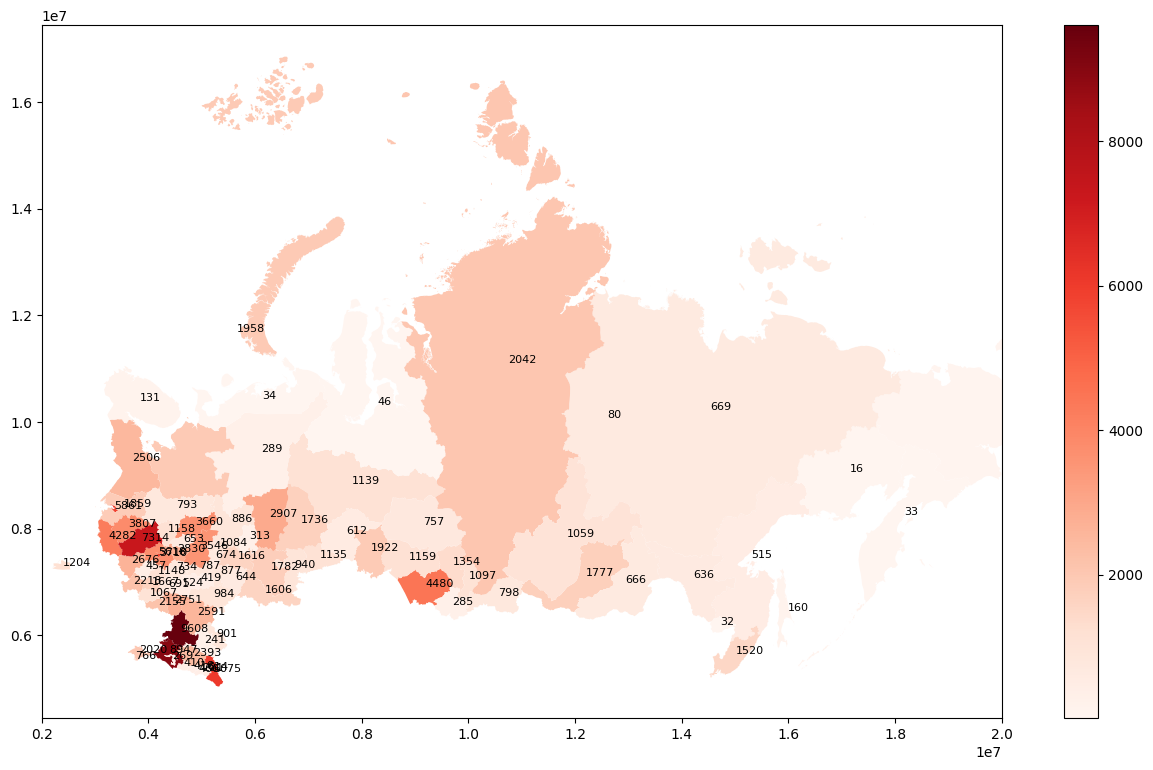

22    674
Name: Объект, dtype: int64


In [8]:
#Заменим названия регионов из-за несоответствия в названиях 
geo = geo.replace({
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ": "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА",
    "РЕСПУБЛИКА АДЫГЕЯ": "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)",
    "ЧУВАШСКАЯ РЕСПУБЛИКА": "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ",
    "РЕСПУБЛИКА МАРИЙ-ЭЛ": "РЕСПУБЛИКА МАРИЙ ЭЛ",
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ": "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "РЕСПУБЛИКА ТАТАРСТАН": "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"
})
#Перейдем к слиянию наборов данных (основного и гео). За основу возьмем гео
geo = pd.merge(left=geo, right=data,
              left_on="NL_NAME_1", right_on="Регион", how="left")
#чтобы найти несоответствия в названиях регионов, выведем все строки – 6 регионов
#print (geo[geo["Объект"].isnull()])
#Создадим холст и область адресовки. На область нанесем картограмму
fig = plt.figure(figsize=(16,9))
area = plt.subplot(1, 1, 1)

geo.plot(ax=area, legend=True, column="Объект", cmap="Reds")
#зададим лимиты по оси Х set_xlim
area.set_xlim(2e6, 2e7)
#создадим аннотацию путем перебора данных "Объект"
for _, region in geo.iterrows():
    area.annotate(region["Объект"],
#число объектов разместим в центроиде полигона, отвечающего за конкретный регион
                 xy=(region.geometry.centroid.x,
                    region.geometry.centroid.y), fontsize=8)
plt.show()
print (geo[geo["NL_NAME_1"] == "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ"]["Объект"])
